---
title: "Introduccion EDO con Python"
author:
  - name: Luis E. Ascencio G. 
    orcid: 0009-0009-1694-5993
    email: luis.ascencio@cimat.mx
    affiliation: 
      - name: CIMAT
        city: Guanajuato
        state: Guanajuato
        url: https://www.cimat.mx
abstract: > 
 En este NoteBook encontraras codigo para manejar EDO con el lenguaje de programacion Python.
keywords:
  - Ecuaciones Diferenciales Ordinarias
  - Metodos Numericos
  - Campos Vectoriales 
  - Curvas Integrales 
license: "CC BY"
copyright: 
  holder: Luis E. Ascencio G.
  year: 2026
citation: 
  container-title: CIMAT
  volume: 1
  issue: 1
  doi: 000000/00000000
funding: "This work was supported by the Mexican Secretariat of Science, Humanities, Technology, and Innovation (SECIHTI, México) project CBF2023-2024-3976. Luis Enrique Ascencio Gorozpe is a doctoral student from the PhD in Probability and Statistics program, at Mathematics research center (CIMAT), he received fellowship with number (CVU) 695305 from SECIHTI."
format:
  pdf:
    documentclass: scrartcl
    toc: true
    number-sections: true
    colorlinks: true
---

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ==========================================
# 1. User Definitions & Configuration
# ==========================================

# Configuration Parameters
CONFIG = {
    'x_range': (-3, 3),      # Domain for x
    'y_range': (-3, 3),      # Domain for y
    'grid_density': 25,      # Density of arrows in vector field
    'num_integral_curves': 25, # Number of curves for Figure 2
    'specific_ics': [-3,-2,-1,-0.5,0,0.5,1,2,3], # Specific initial conditions y(x_start) for Figure 3
    'resolution': 500        # Resolution for numerical integration steps
}

# ==========================================
# 2. Visualization Functions
# ==========================================

def plot_vector_field(f, x_lim, y_lim, density=20):
    """
    Figure 1: Generates the Vector Field (Slope Field).
    
    Mathematical Context:
    At every point (x, y), the ODE defines a slope m = f(x,y).
    The vector at that point is <1, f(x,y)>.
    We normalize these vectors to show direction without magnitude distortion.
    """
    fig = plt.figure(figsize=(10, 8))
    
    # Create a grid of points
    x = np.linspace(x_lim[0], x_lim[1], density)
    y = np.linspace(y_lim[0], y_lim[1], density)
    X, Y = np.meshgrid(x, y)
    
    # Calculate vector components
    # dx is constant (1), dy is the function output
    U = np.ones_like(X)
    V = f(X, Y)
    
    # Normalize the arrows (make them all unit length for clarity)
    # Magnitude N = sqrt(U^2 + V^2)
    N = np.sqrt(U**2 + V**2)
    U = U / N
    V = V / N
    
    # Plot Quiver
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=3, color='#555555', width=0.003)
    
    # Styling
    plt.title("Figure 1: Vector Field (Direction Field)", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    # Add equation text
    plt.text(x_lim[0] + 0.5, y_lim[1] - 0.5, r"$\frac{dy}{dx} = f(x,y)$", 
             fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

def plot_integral_curves(f, x_lim, y_lim, num_curves=20):
    """
    Figure 2: Plots a dense set of integral curves to show flow.
    
    Method:
    We define a range of initial conditions along the left boundary (x_min)
    and integrate forward to x_max using Runge-Kutta 4(5).
    """
    fig = plt.figure(figsize=(10, 8))
    
    # Generate initial conditions along the left edge
    y0_values = np.linspace(y_lim[0], y_lim[1], num_curves)
    x_span = x_lim
    
    # Evaluation points for smooth curves
    t_eval = np.linspace(x_lim[0], x_lim[1], CONFIG['resolution'])
    
    # Plot background vector field faintly for context
    x_grid = np.linspace(x_lim[0], x_lim[1], 20)
    y_grid = np.linspace(y_lim[0], y_lim[1], 20)
    X, Y = np.meshgrid(x_grid, y_grid)
    U = np.ones_like(X)
    V = f(X, Y)
    N = np.sqrt(U**2 + V**2)
    plt.quiver(X, Y, U/N, V/N, alpha=0.2, color='gray')

    # Solve and plot each curve
    print(f"Generating {num_curves} integral curves...")
    for y0 in y0_values:
        # solve_ivp requires function signature fun(t, y)
        sol = solve_ivp(f, x_span, [y0], t_eval=t_eval, method='RK45')
        
        if sol.success:
            plt.plot(sol.t, sol.y[0], '-', color='teal', alpha=0.6, linewidth=1.5)

    # Styling
    plt.title("Figure 2: Integral Curves (General Flow)", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    plt.tight_layout()
    plt.show()

def plot_specific_solutions(f, x_lim, y_lim, initial_conditions):
    """
    Figure 3: Plots specific, labeled numerical solutions.
    
    Use Case:
    Highlighting specific behaviors based on exact starting points.
    """
    fig = plt.figure(figsize=(10, 8))
    
    x_span = x_lim
    t_eval = np.linspace(x_lim[0], x_lim[1], CONFIG['resolution'])
    
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(initial_conditions)))
    
    print("Generating specific solutions...")
    for i, y0 in enumerate(initial_conditions):
        sol = solve_ivp(f, x_span, [y0], t_eval=t_eval, method='RK45')
        
        if sol.success:
            label_text = f"$y({x_lim[0]}) = {y0}$"
            plt.plot(sol.t, sol.y[0], linewidth=2.5, color=colors[i], label=label_text)
            
            # Mark the initial condition point
            plt.scatter([x_lim[0]], [y0], color=colors[i], s=50, zorder=5)

    # Styling
    plt.title("Figure 3: Specific Numerical Solutions", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title="Initial Conditions", loc='best', frameon=True, shadow=True)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    plt.tight_layout()
    plt.show()

# ==========================================
# 3. Main Execution Block
# ==========================================

def plots_ODE(ode_f):
    print("--- Differential Equation Visualizer ---")
    print(f"ODE: dy/dx = x - y")
    print(f"Domain: x in {CONFIG['x_range']}, y in {CONFIG['y_range']}")
    
    # 1. Plot Vector Field
    plot_vector_field(
        ode_f, 
        CONFIG['x_range'], 
        CONFIG['y_range'], 
        density=CONFIG['grid_density']
    )
    
    # 2. Plot Integral Curves (Flow)
    plot_integral_curves(
        ode_f, 
        CONFIG['x_range'], 
        CONFIG['y_range'], 
        num_curves=CONFIG['num_integral_curves']
    )
    
    # 3. Plot Specific Solutions
    plot_specific_solutions(
        ode_f, 
        CONFIG['x_range'], 
        CONFIG['y_range'], 
        initial_conditions=CONFIG['specific_ics']
    )

In [54]:
def ode_f1(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx = x - y
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return -0.5*y

In [55]:
def ode_f2(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx = y^2
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return y**2

In [56]:
def ode_f3(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx =  y - sin(x)
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return y-np.sin(x)

In [57]:
def ode_f4(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx =  -x**2+np.sin(y)
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return -x**2+np.sin(y)

In [58]:
def ode_f5(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx = x**2-y
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return x**2-y

In [59]:
def ode_f6(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx =  np.sin(x-y)
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return np.sin(x-y)

In [68]:
def ode_f7(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx =  -6*x*y
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return -6*x*y

In [69]:
def ode_f8(x, y):
    """
    Defines the First-Order ODE: dy/dx = f(x, y).
    
    Example: dy/dx = (4-2*x)/(3*y**2-5)
    
    Parameters:
        x (float): Independent variable (often time).
        y (float): Dependent variable.
        
    Returns:
        float: The derivative dy/dx at (x, y).
    """
    return (4-2*x)/(3*y**2-5)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


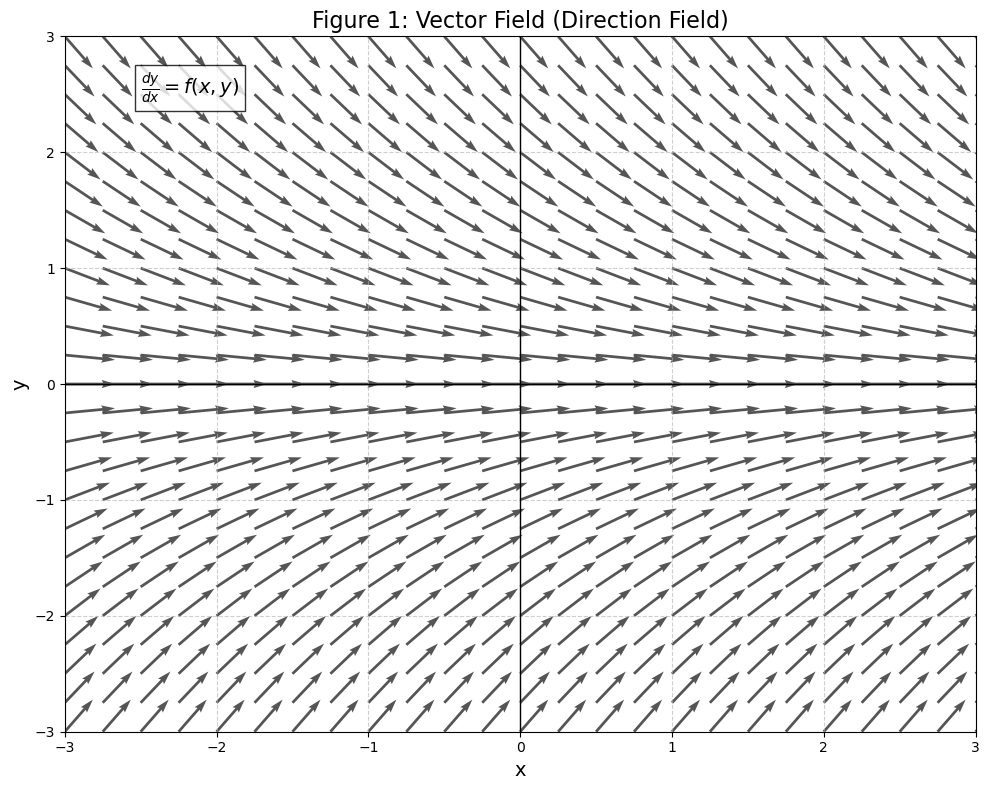

Generating 25 integral curves...


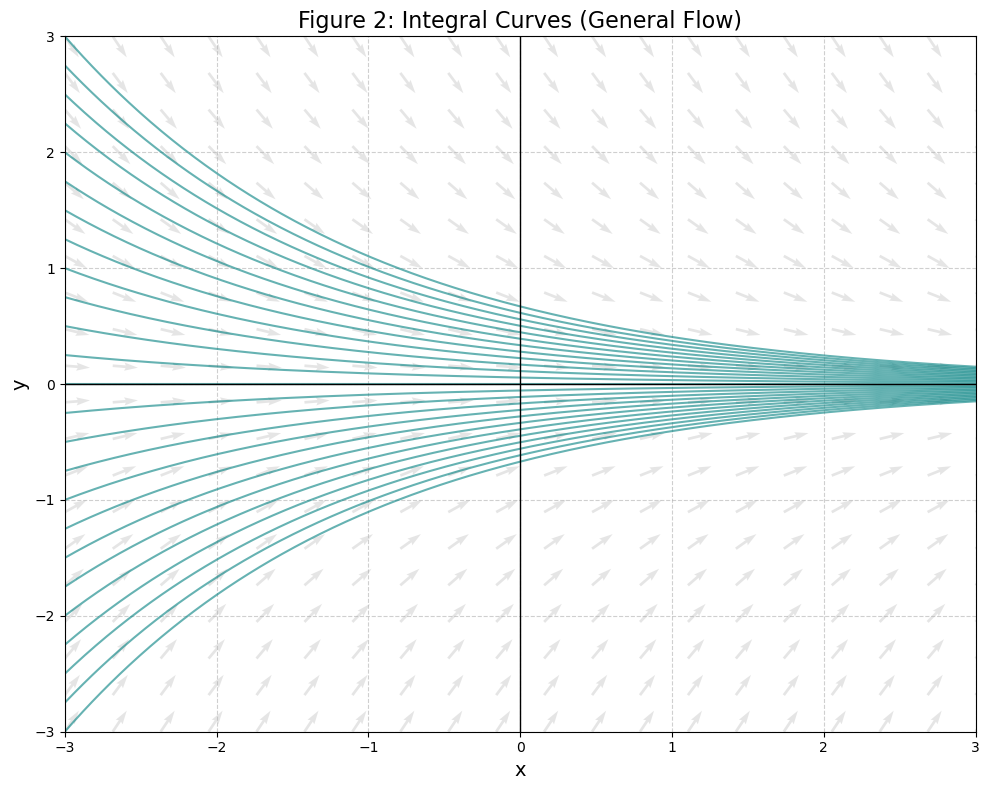

Generating specific solutions...


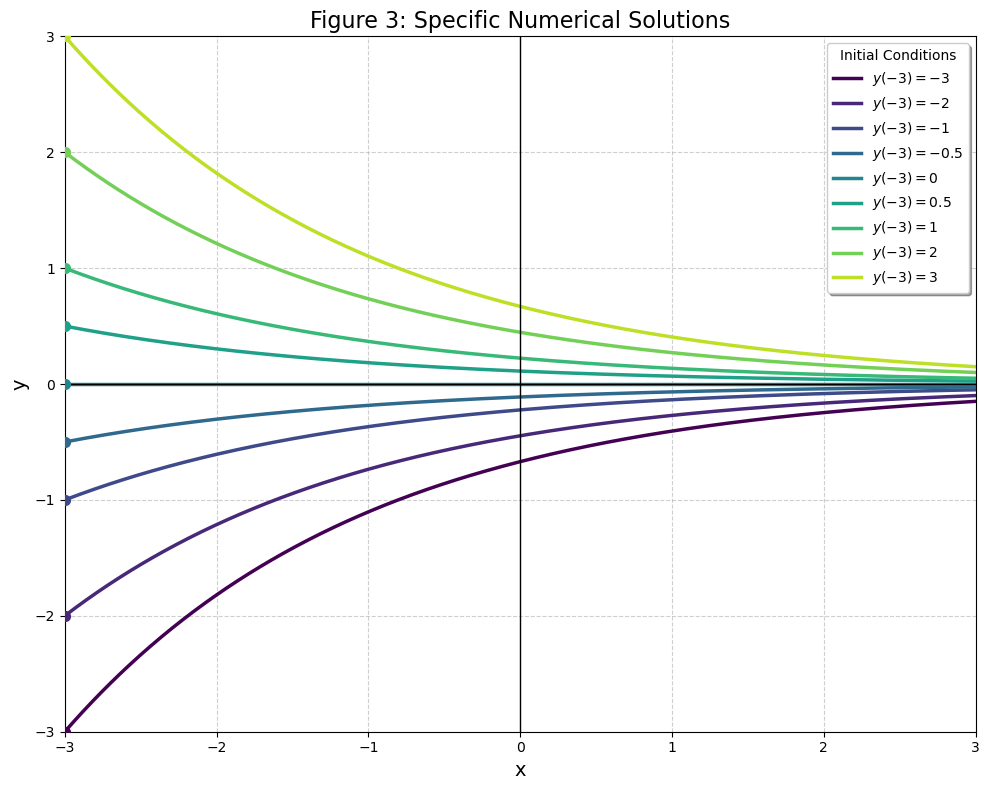

In [60]:
plots_ODE(ode_f1)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


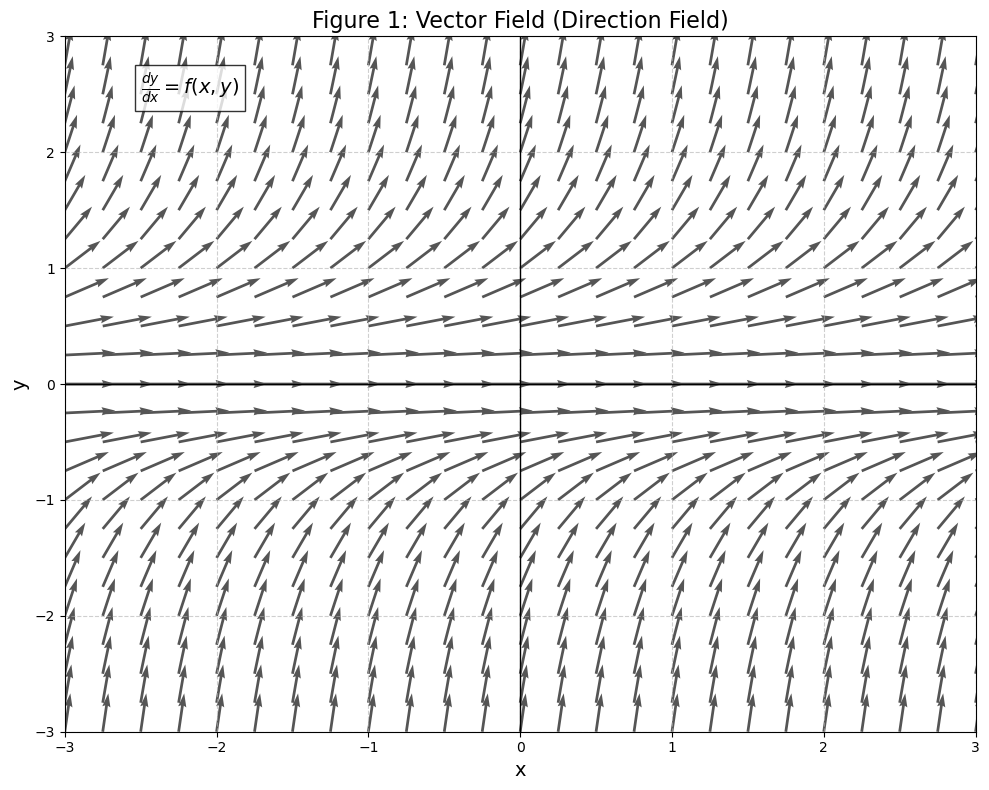

Generating 25 integral curves...


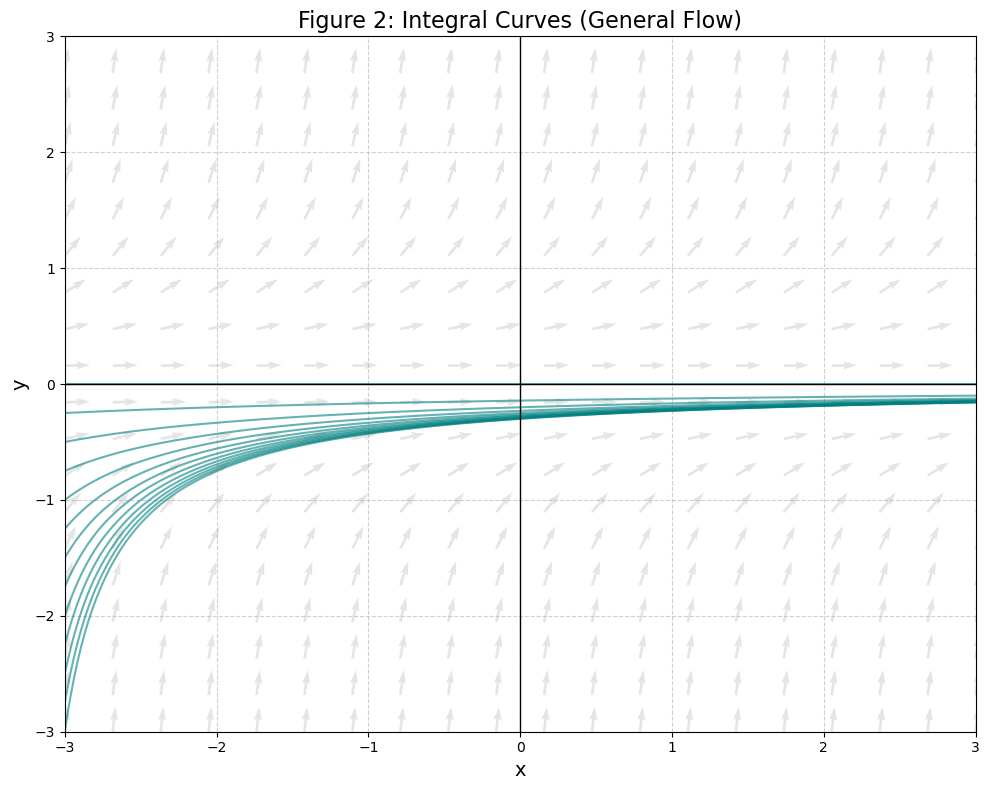

Generating specific solutions...


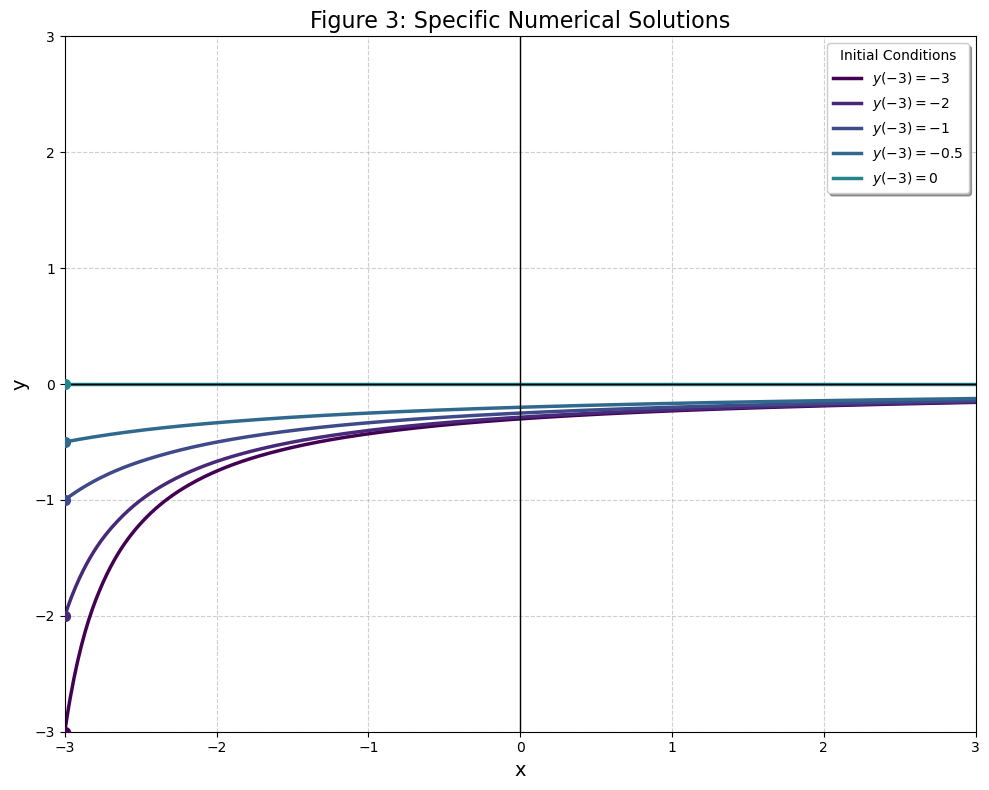

In [61]:
plots_ODE(ode_f2)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


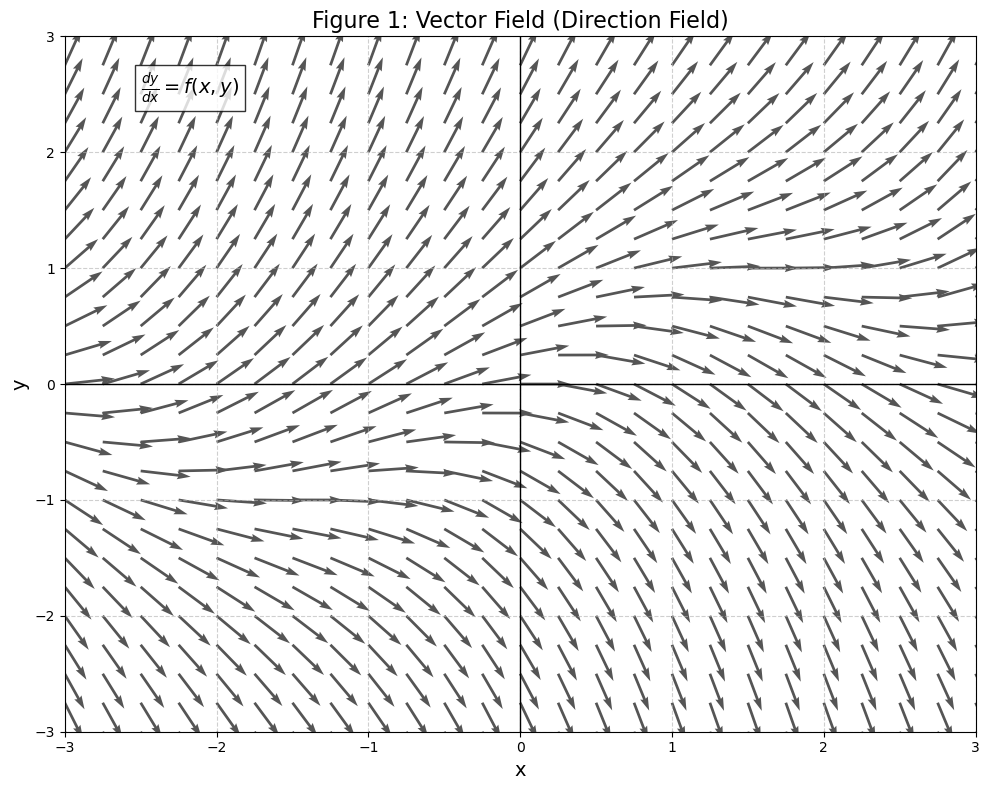

Generating 25 integral curves...


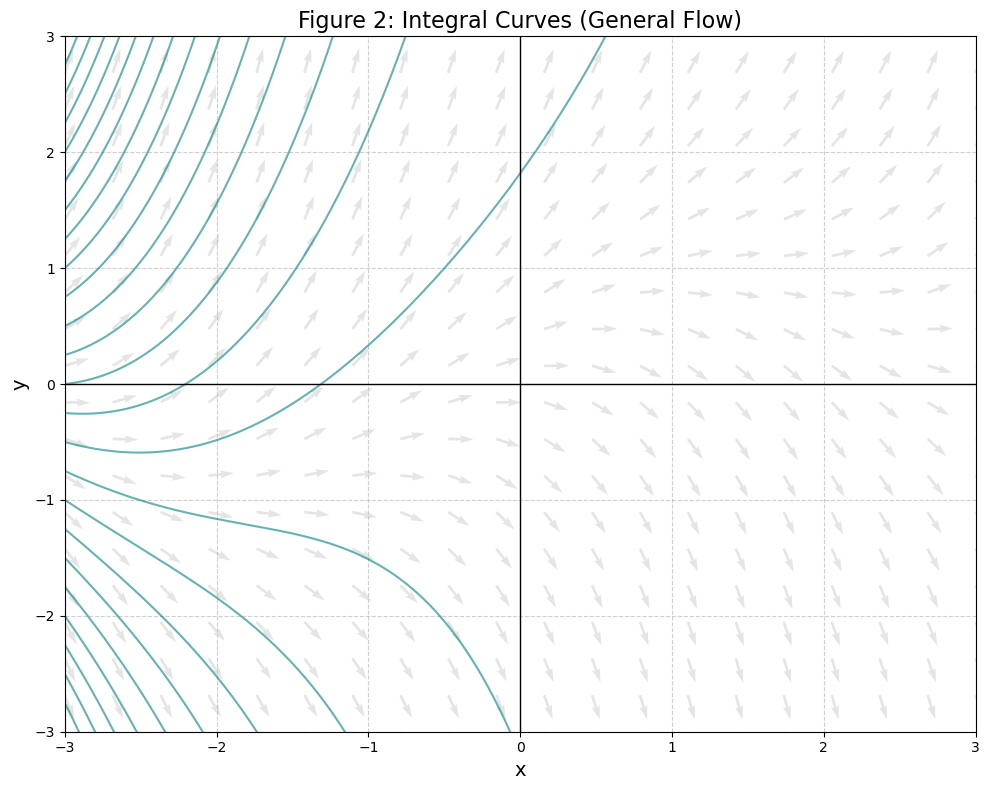

Generating specific solutions...


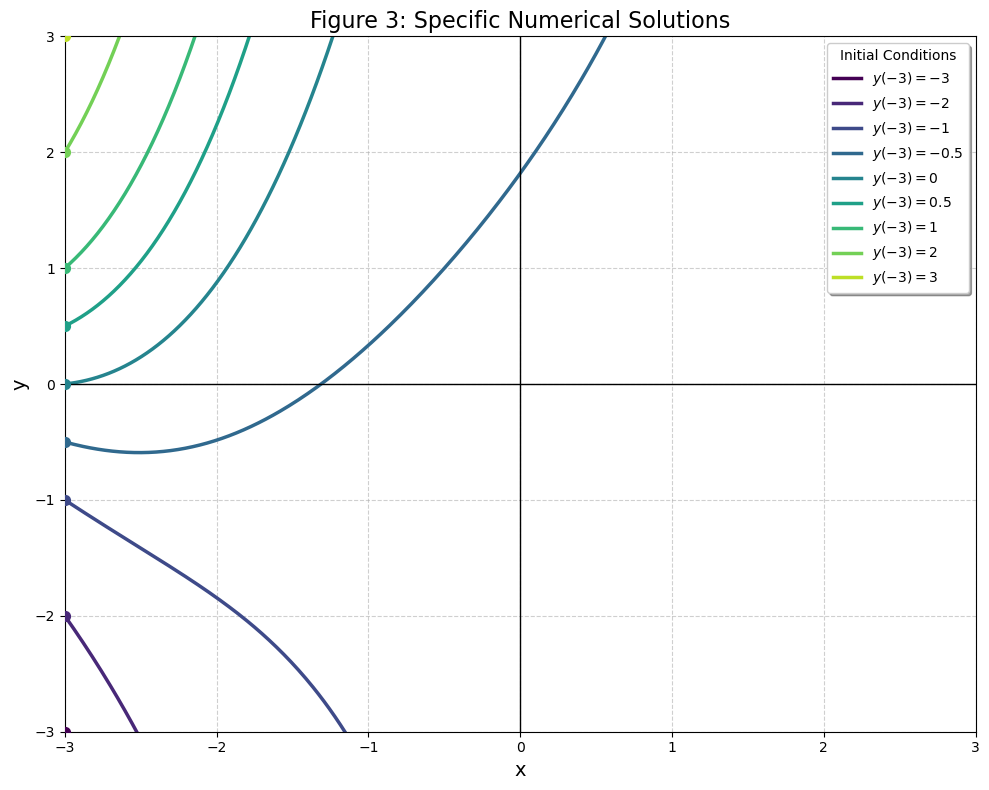

In [62]:
plots_ODE(ode_f3)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


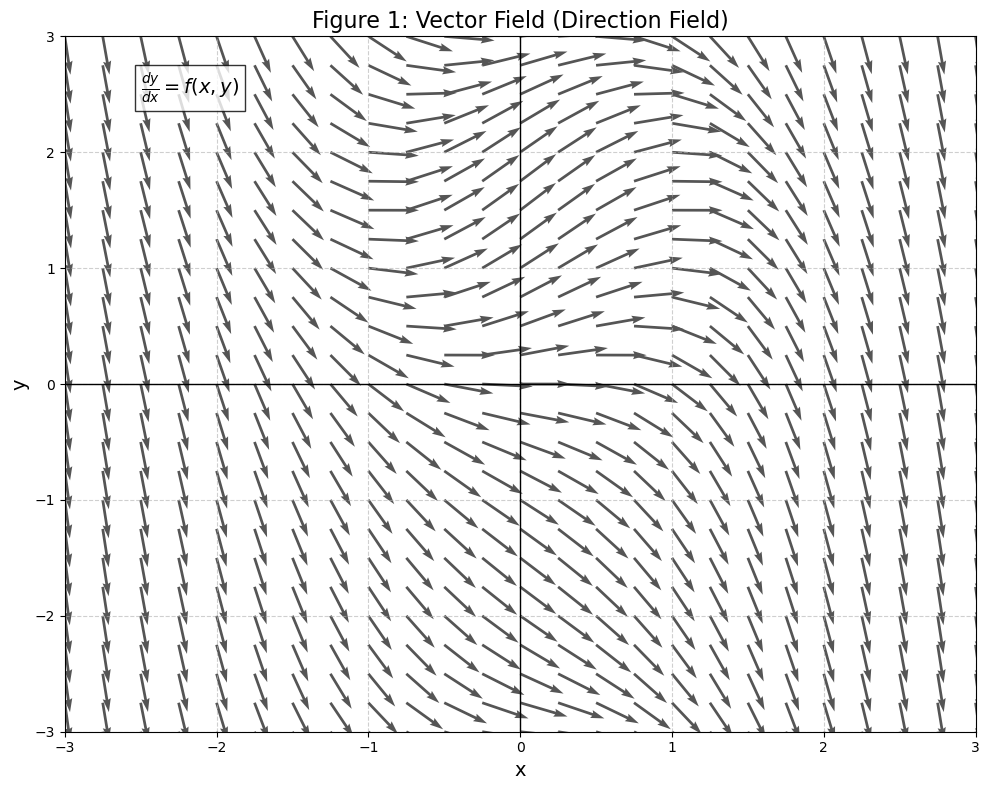

Generating 25 integral curves...


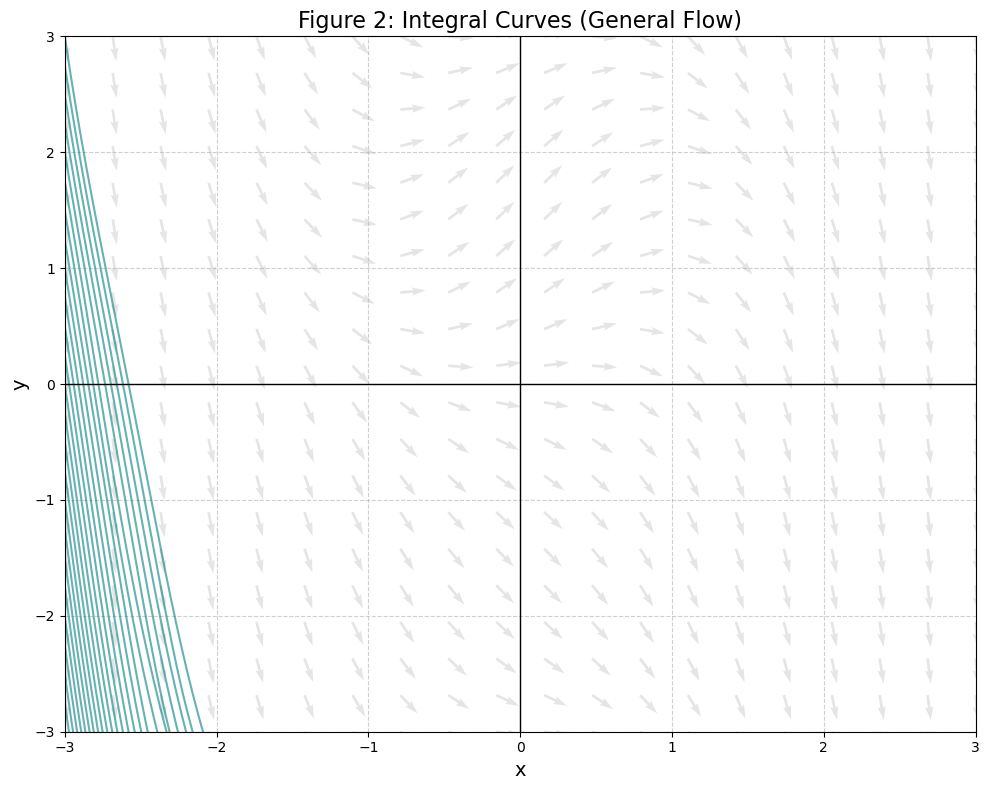

Generating specific solutions...


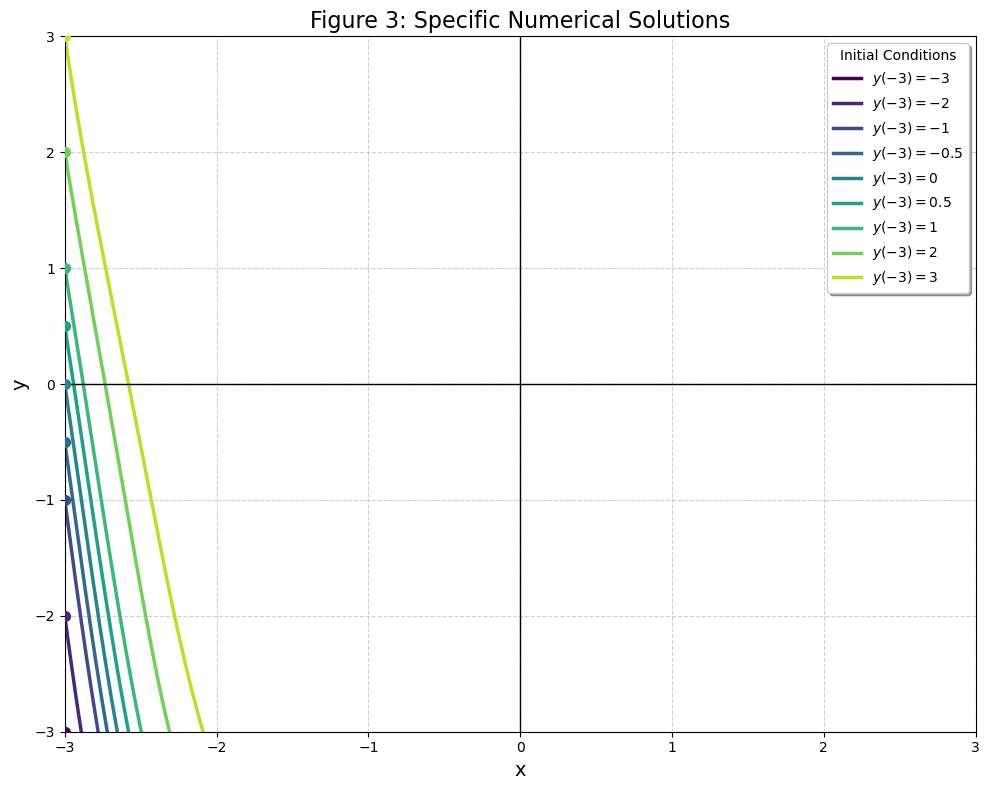

In [63]:
plots_ODE(ode_f4)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


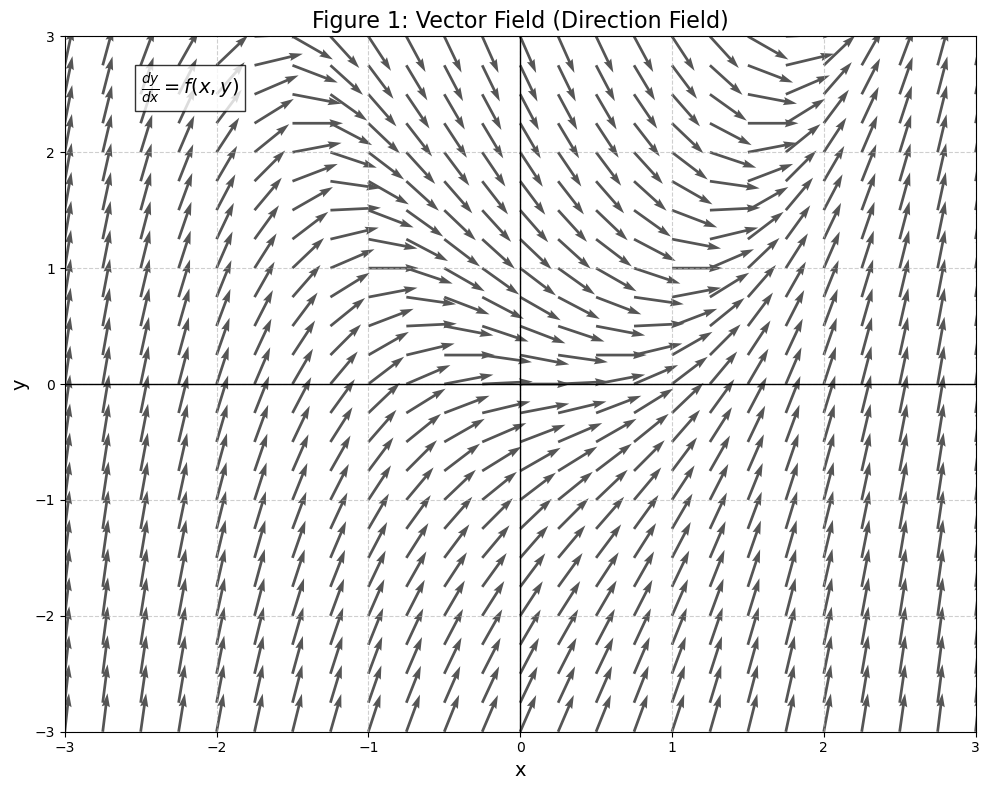

Generating 25 integral curves...


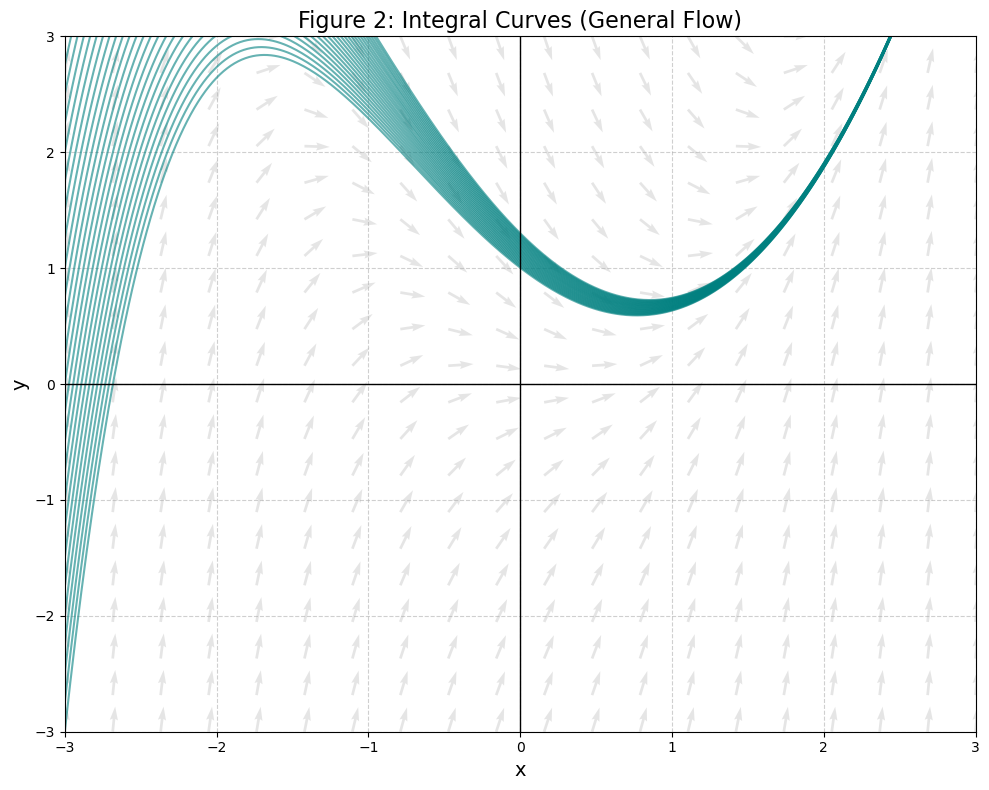

Generating specific solutions...


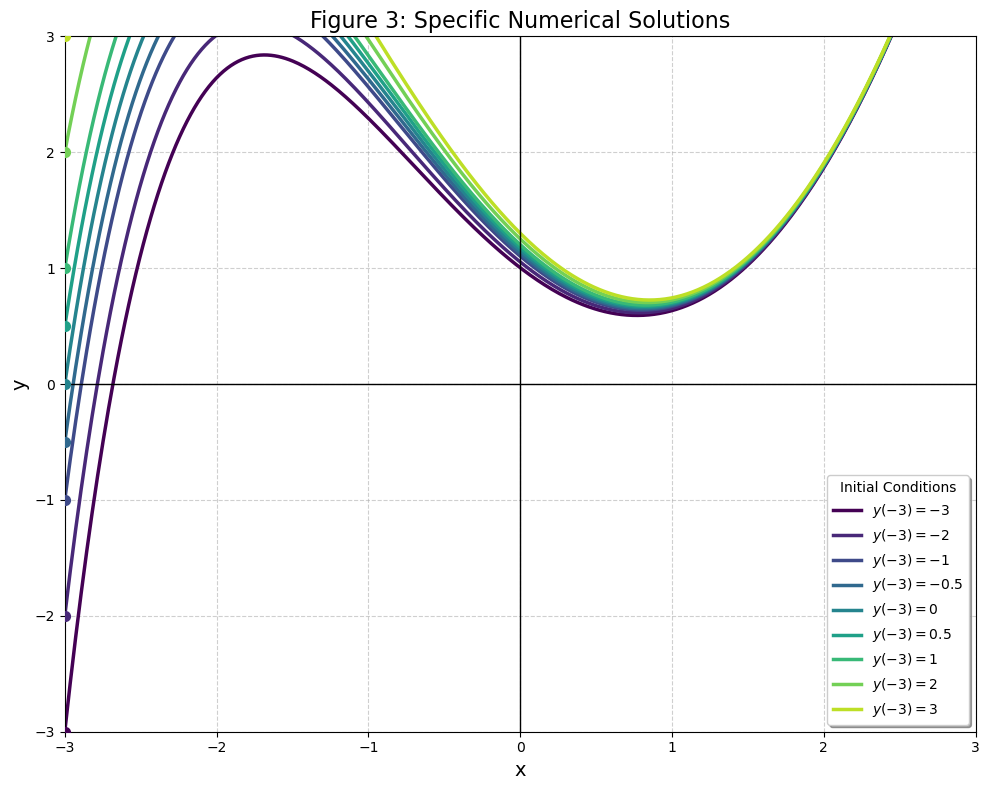

In [64]:
plots_ODE(ode_f5)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


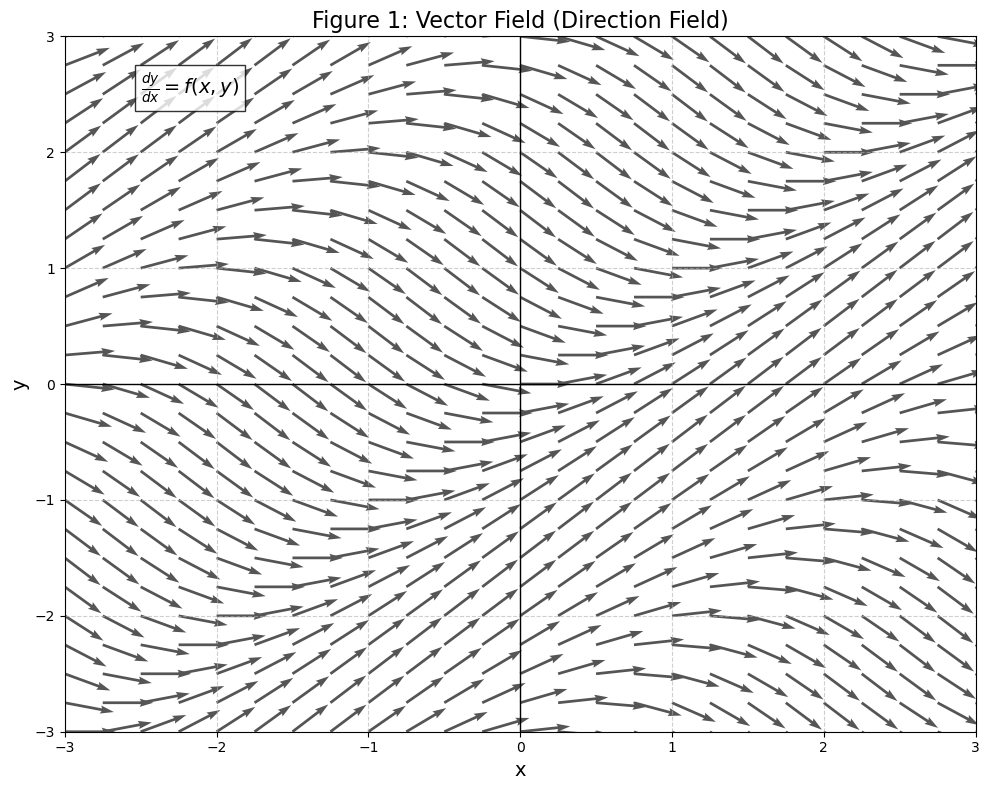

Generating 25 integral curves...


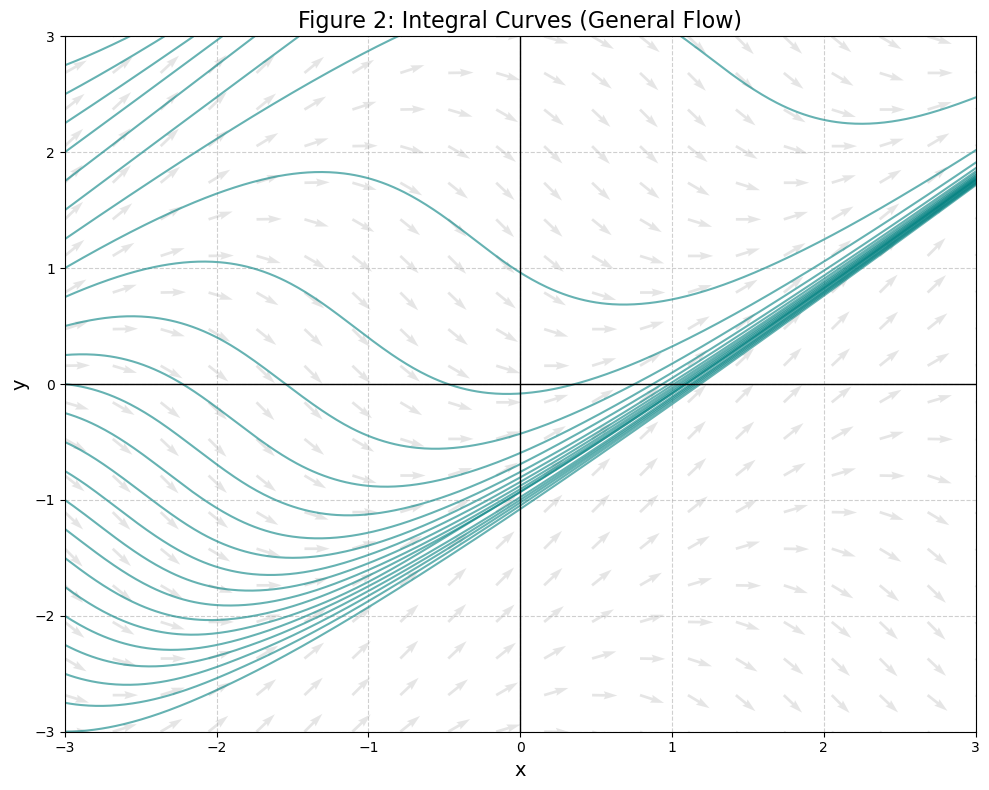

Generating specific solutions...


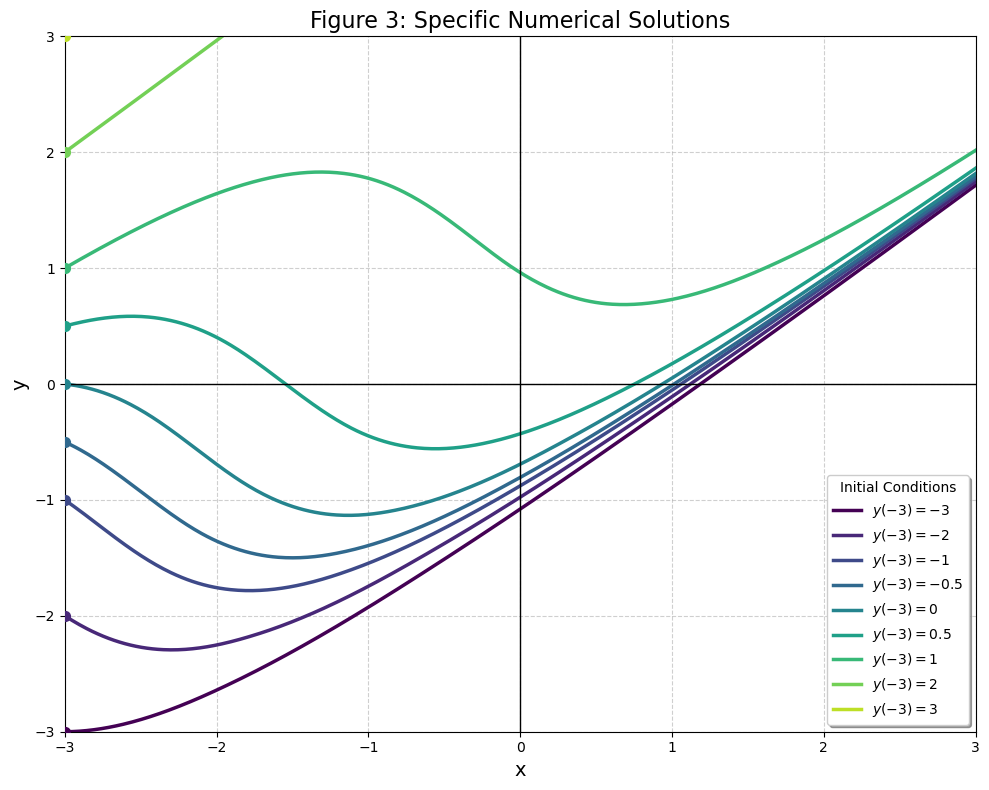

In [65]:
plots_ODE(ode_f6)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


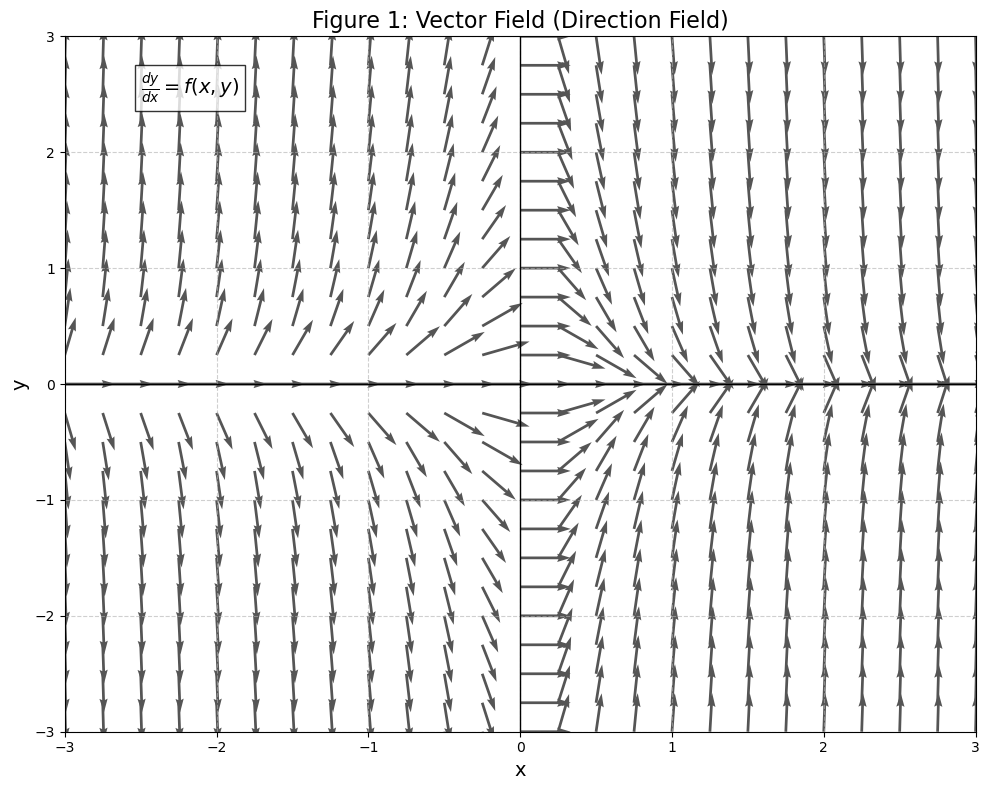

Generating 25 integral curves...


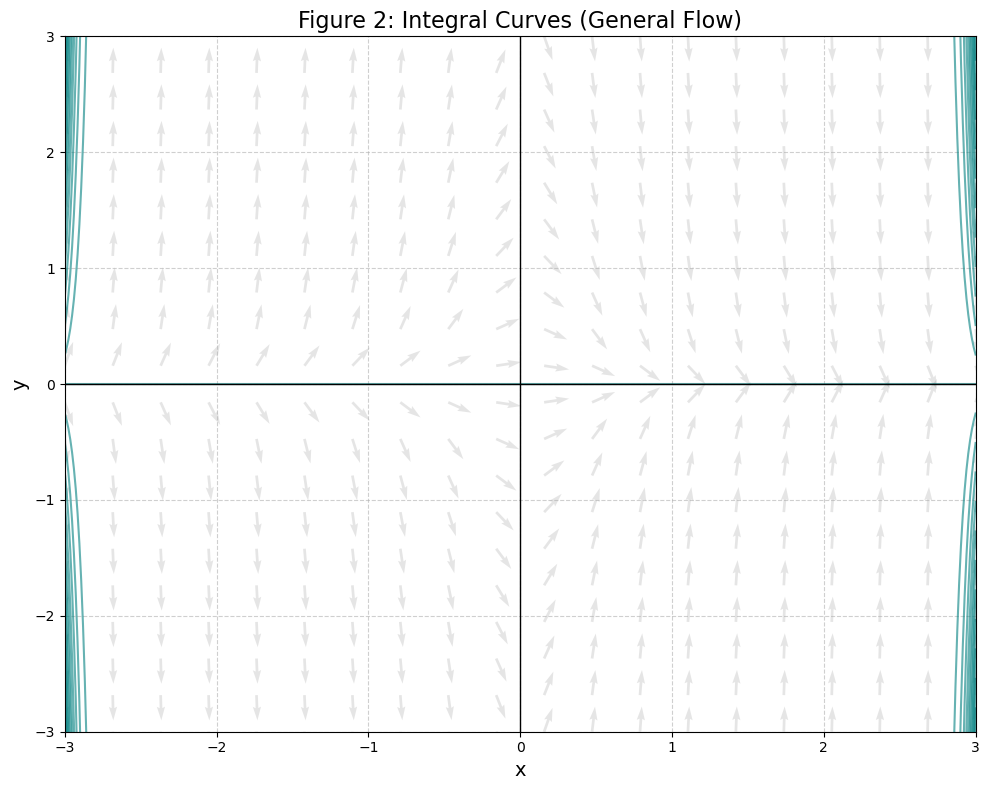

Generating specific solutions...


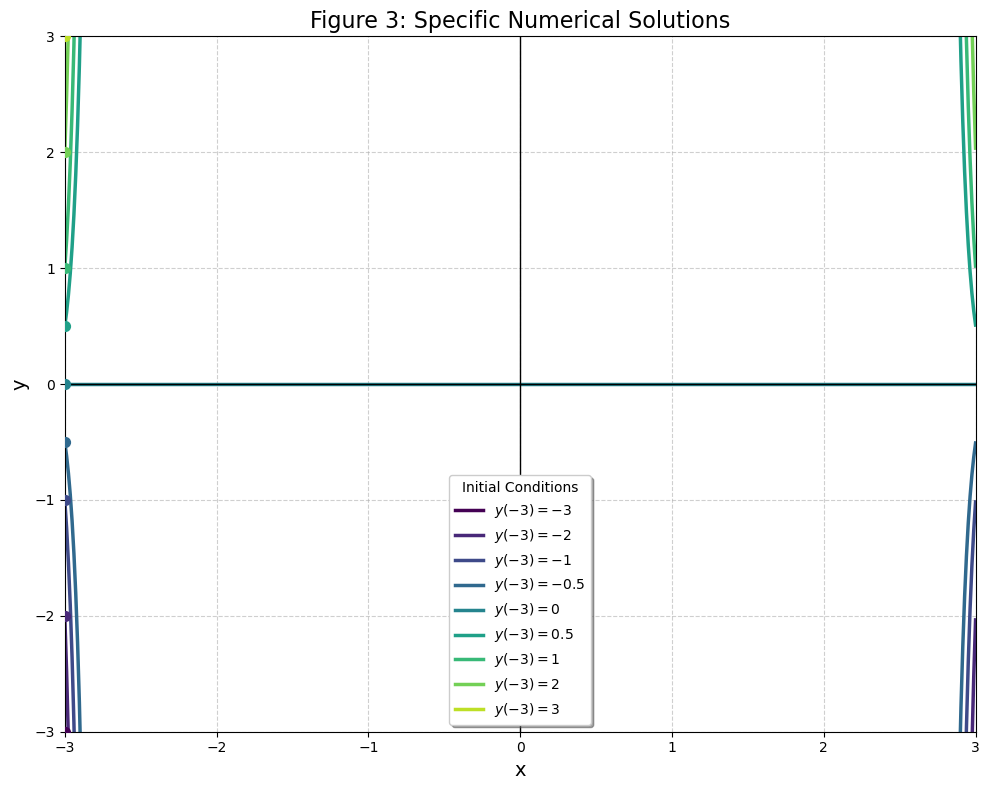

In [67]:
plots_ODE(ode_f7)

--- Differential Equation Visualizer ---
ODE: dy/dx = x - y
Domain: x in (-3, 3), y in (-3, 3)


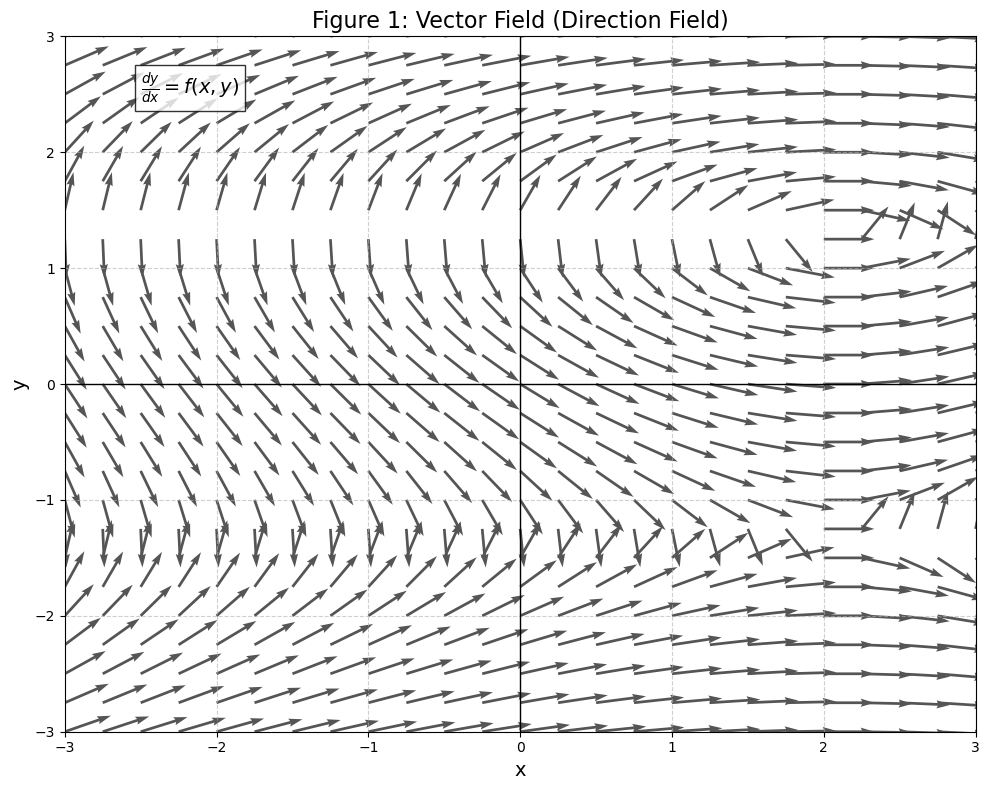

Generating 25 integral curves...


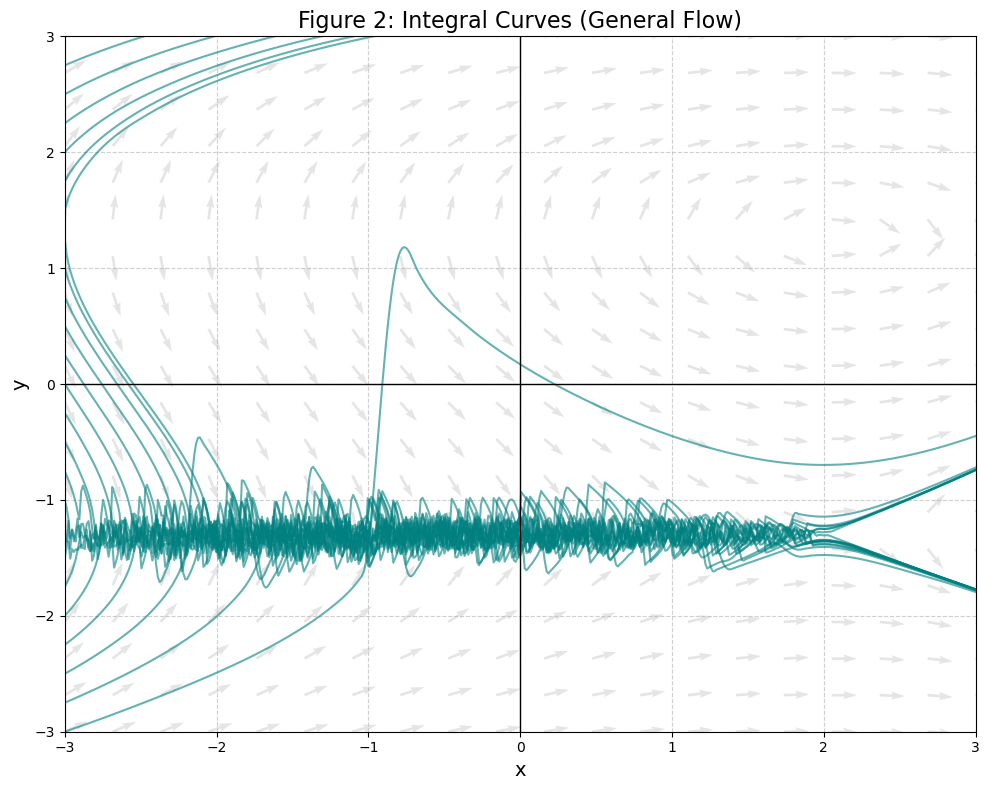

Generating specific solutions...


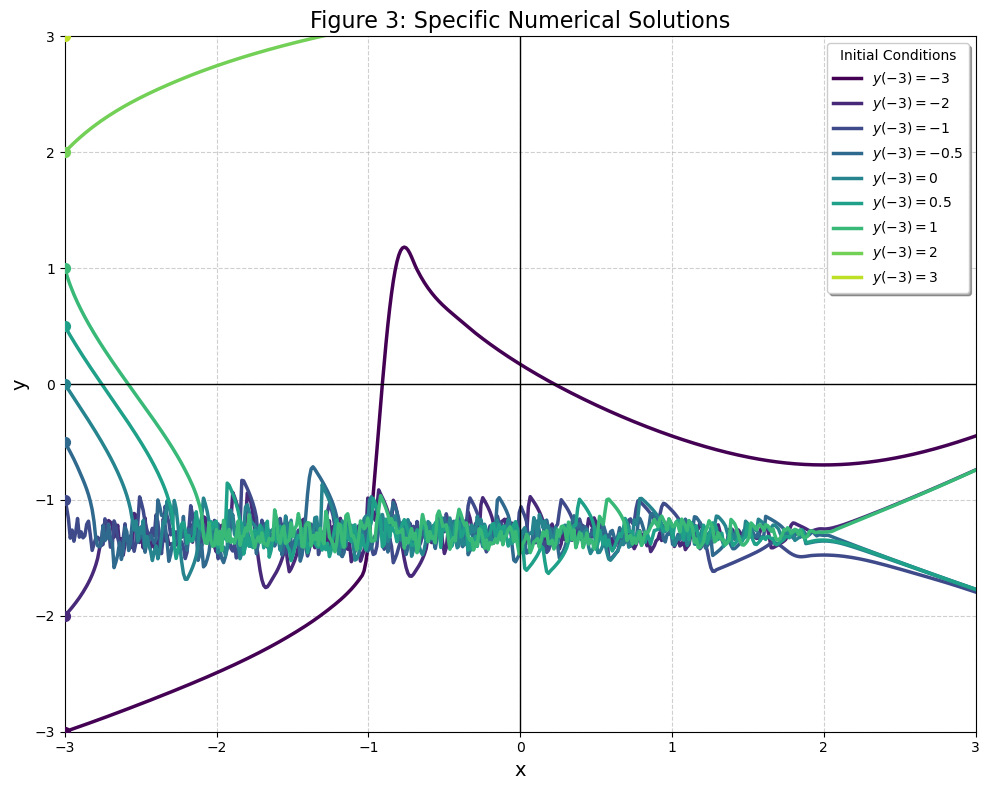

In [70]:
plots_ODE(ode_f8)